# 1. Lineer Ayrim

## 1.a. Dataset

### 1.a.I. Dataset Olusturma

Iki boyutlu bir uzayda, lineer karar sinirlarina ihtiyac duyacak 1000 ornek ve 2 siniftan olusacak bir veri seti oluşturun.

> Datasetinizi olustururken, tasniflendirme varsayimlarindan yararlaniniz.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # data generation
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate, train_test_split 
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns

In [31]:
x = np.random.randn(1000,2)

In [48]:
np.random.seed(42)
beta = np.random.randn(2,1) * 9

In [49]:
k=0.3
logit = x @ beta + k 

In [50]:
p = 1/(1+np.e**(-logit))

In [51]:
p.min()

2.154444960155927e-07

In [52]:
p[0]

array([0.23692743])

In [53]:
p = p.ravel()

In [54]:
y = [np.random.choice([1,0],p=[p[i],1-p[i]]) for i in range(len(p))]

y = np.array(y)
y[:5]

array([0, 1, 1, 1, 0])

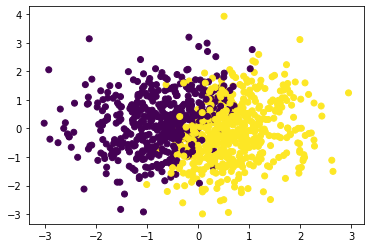

In [55]:
plt.scatter(x[:,0],x[:,1],c=y)

### 1.a.II. Mukemmel Model

Herhangi bir makine ogrenmesi modeli, dataseti olustururken kullanmis oldugunuz fonksiyonu tam olarak dogru tespit etseydi, sonsuz sayida ornek icin bu modelle yapilan tahminlerin isabet orani (accuracy) ne olurdu?

> Deneysel bir cevap verebilirsiniz.

In [63]:
sonsuz= np.random.randn(1000000,2)

In [66]:
sonsuzlogit = sonsuz @ beta + k
sonsuzlogit

array([[ 0.5783972 ],
       [ 2.16740536],
       [ 2.48428489],
       ...,
       [-2.01320214],
       [-3.12575952],
       [ 3.96325295]])

In [71]:
sonsuz_p = 1/(1+np.e**(-sonsuzlogit))
sonsuz_p

array([[0.64069852],
       [0.89728408],
       [0.92303276],
       ...,
       [0.11782374],
       [0.04205712],
       [0.98135311]])

In [73]:
sonsuz_p = sonsuz_p.ravel()

sonsuz_y = [np.random.choice([1,0],p=[sonsuz_p[i],1-sonsuz_p[i]]) for i in range(len(sonsuz_p))]

sonsuz_y = np.array(sonsuz_y)
sonsuz_y[:5]

array([0, 1, 1, 0, 0])

In [74]:
def model(x):
    k=0.3
    logit = x @ beta + k
    logit = logit.ravel()
    tahmin = np.array(logit)
    tahmin[logit<0] = 0
    tahmin[logit>=0] = 1
    return tahmin  

In [77]:
sonsuz_pred = model(sonsuz)
sonsuz_pred

array([1., 1., 1., ..., 0., 0., 1.])

In [79]:
(sonsuz_pred == sonsuz_y).mean()

0.887927

## 1.b. Tasniflendirme

Bu kisimda hazirlamis oldugumuz dataset uzerinde bir *Lojistik Regresyon* modeli egitecegiz.

### 1.b.I. Egitim

Dataseti uygun oranlarda egitim ve test kisimlarina ayirarak, modelinizi egitim verisi uzerinde egitiniz.

In [82]:
model = LogisticRegression()

In [85]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, stratify=y)

In [87]:
model.fit(x_train,y_train)

LogisticRegression()

### 1.b.II. Modelin Aciklanmasi

Model tarafindan ogrenilen parametreleri gosteriniz. Ogrenilen fonksiyonu, dataseti olustururken kendi kullanmis oldugunuz fonksiyon ile kiyaslayiniz.

In [89]:
model.coef_

array([[ 4.31424985, -1.31312024]])

In [90]:
model.intercept_

array([0.15889031])

In [92]:
beta  # k=0.3 idi, k yı yeterince iyi bulamamış ancak beta değerleri yakın.

array([[ 4.47042738],
       [-1.24437871]])

In [97]:
model.coef_[0,1]/model.coef_[0,0]

-0.3043681479390636

In [99]:
beta = beta.ravel()

In [101]:
beta[1]/beta[0]  #Eğim bayağı yakın olarak bulunmuş.

-0.27835788518000604

### 1.b.III. Modelin Test Edilmesi

Egitmis oldugunuz modeli test seti uzerinde kullanarak isabet oranini bulunuz.

In [107]:
model.score(x_test,y_test)

0.875

### 1.b.IV. Gercek Hata

Modelin ogrenmis oldugu parametreler ile sonsuz sayida ornek icin tahmin yapilsaydi isabet orani (accuracy) ne olurdu? 

> Deneysel bir cevap verebilirsiniz.
>
> Cevabinizi *egitim skoru* ve *test skoru* ile karsilastiriniz.

In [109]:
model.score(sonsuz,sonsuz_y)

0.886973

In [111]:
(sonsuz_pred == sonsuz_y).mean()

0.887927

In [112]:
model.score(x_train,y_train)

0.88875

## 1.c. Parametreler

### 1.c.I. Parametre tipleri

> Model tarafindan ogrenilmeyen, kullanici tarafindan egitime baslamadan once belirlenmesi gereken parametrelere **hiperparametre** denir.

- Kullanmis oldugunuz *Lojistik Regresyon* modelinde hangi hiperparametreler vardir?
- Yukarida belirttiginiz hiperparametrelerin gorevlerini kisaca aciklayiniz.

In [ ]:
LogisticRegression()

Regülarizasyon katsayısı lambda, bir hiperparametre örneğidir.

### 1.c.II. Regularizasyon

`C` parametresinin `[1e-3, 1e-2, 1e-1, 1, 10, 100]` degerleri icin *Lojistik Regresyon* modelinizi 10 parcali capraz dogrulamaya tabi tutunuz. 

`C` parametresinin her bir degeri icin elde etmis oldugunuz ortalama test ve ortalama egitim skorlarini (accuracy) gorsellestiriniz.

### 1.c.III. Parametrelerin Optimal Degerlerini Belirleme

`1.c.II.` kisminda elde ettiginiz gorseli yorumlayiniz.

- Nasil bir sonuc gormeyi bekliyordunuz?
- Beklentiniz ile deney sonucu uyusmakta midir?
- Yukselen `C` degeri icin egitim ve test skorlarinin hareketi nasildir?
- Dusen `C` degeri icin egitim ve test skorlarinin hareketi nasildir?